In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('train-left-up.csv') 
df.head()

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


# 2 第二章：数据重构
## 2.4 数据的合并
### 2.4.1 任务一：将data文件夹里面的所有数据都载入，与之前的原始数据相比，观察他们的之间的关系

In [2]:
df_left_up = pd.read_csv('train-left-up.csv')
df_left_down = pd.read_csv('train-left-down.csv')
df_right_up = pd.read_csv('train-right-up.csv')
df_right_down = pd.read_csv('train-right-down.csv')

In [3]:
df_left_up.head()

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


In [4]:
df_left_down.head()

,PassengerId,Survived,Pclass,Name
0,440,0,2,"Kvillner, Mr. Johan Henrik Johannesson"
1,441,1,2,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)"
2,442,0,3,"Hampe, Mr. Leon"
3,443,0,3,"Petterson, Mr. Johan Emil"
4,444,1,2,"Reynaldo, Ms. Encarnacion"


In [5]:
df_right_up.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,female,35.0,1,0,113803,53.1000,C123,S
4,male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_right_down.head()

,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,male,31.0,0,0,C.A. 18723,10.500,NaN,S
1,female,45.0,1,1,F.C.C. 13529,26.250,NaN,S
2,male,20.0,0,0,345769,9.500,NaN,S
3,male,25.0,1,0,347076,7.775,NaN,S
4,female,28.0,0,0,230434,13.000,NaN,S


感觉就是把之前的表一分为4了  
### 2.4.2：任务二：使用concat方法：将数据train-left-up.csv和train-right-up.csv横向合并为一张表，并保存这张表为result_up

In [7]:
result_up = pd.concat([df_left_up, df_right_up], axis=1)
result_up.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.4.3 任务三：使用concat方法：将train-left-down和train-right-down横向合并为一张表，并保存这张表为result_down。然后将上边的result_up和result_down纵向合并为result。

In [11]:
result_down = pd.concat([df_left_down, df_right_down], axis=1)
result = pd.concat([result_up,result_down],axis=0)
result.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.4.4 任务四：使用DataFrame自带的方法join方法和append：完成任务二和任务三的任务

In [14]:
result_up = df_left_up.join(df_right_up)#join 默认左连接
result_down = df_left_down.join(df_right_down)
result = result_up.append(result_down) #添加新行
result.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.4.5 任务五：使用Panads的merge方法和DataFrame的append方法：完成任务二和任务三的任务
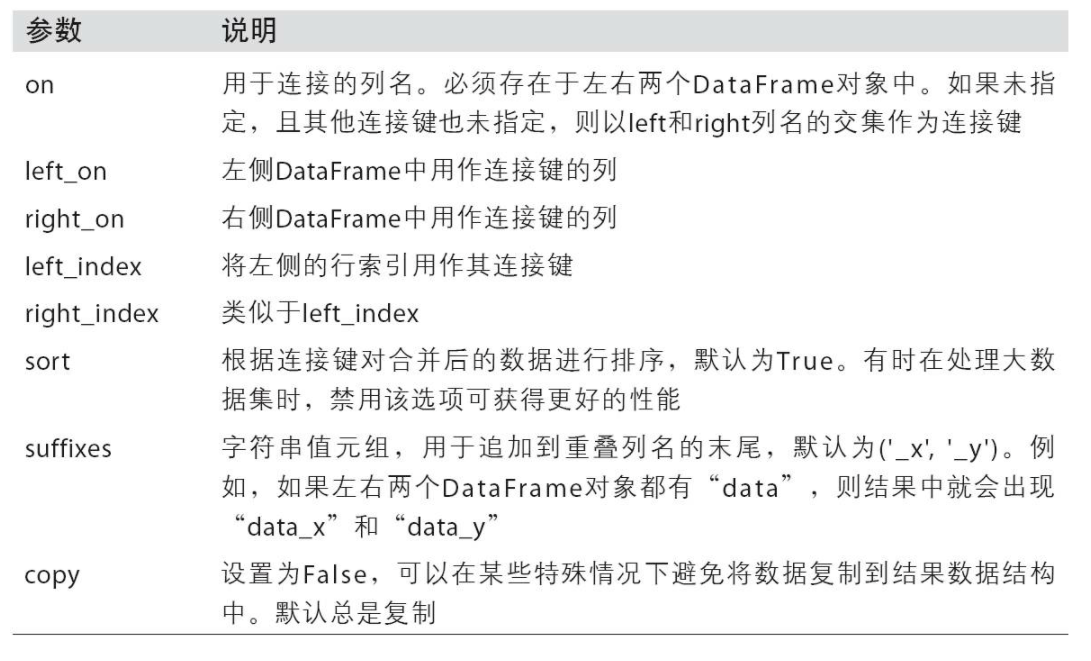

In [16]:
result_up = pd.merge(df_left_up,df_right_up,
                     left_index=True,right_index=True)
result_down = pd.merge(df_left_down,df_right_down,
                       left_index=True,right_index=True)
result = result_up.append(result_down)
result.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2.4.6 任务六：完成的数据保存为result.csv

In [18]:
result.to_csv('result.csv')

## 2.5 换一种角度看数据
### 2.5.1 任务一：将我们的数据变为Series类型的数据

In [19]:
data = pd.read_csv('result.csv')

In [22]:
data.stack() #将列旋转到行 unstack则反之，类似于转置操作

0    Unnamed: 0                                                     0
     PassengerId                                                    1
     Survived                                                       0
     Pclass                                                         3
     Name                                     Braund, Mr. Owen Harris
     Sex                                                         male
     Age                                                           22
     SibSp                                                          1
     Parch                                                          0
     Ticket                                                 A/5 21171
     Fare                                                        7.25
     Embarked                                                       S
1    Unnamed: 0                                                     1
     PassengerId                                                    2
     Survived       

In [21]:
data_unit = data.stack()
data_unit.head()

0  Unnamed: 0                           0
   PassengerId                          1
   Survived                             0
   Pclass                               3
   Name           Braund, Mr. Owen Harris
dtype: object